In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r"C:\Users\priya\Downloads\clustering\archive (1)\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [18]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


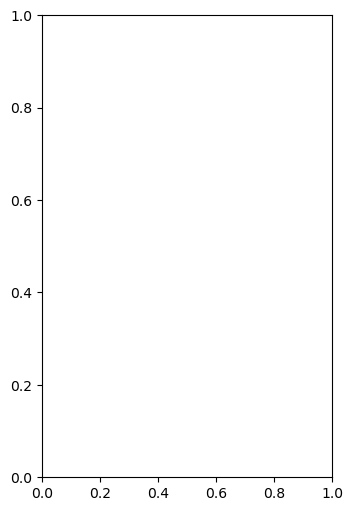

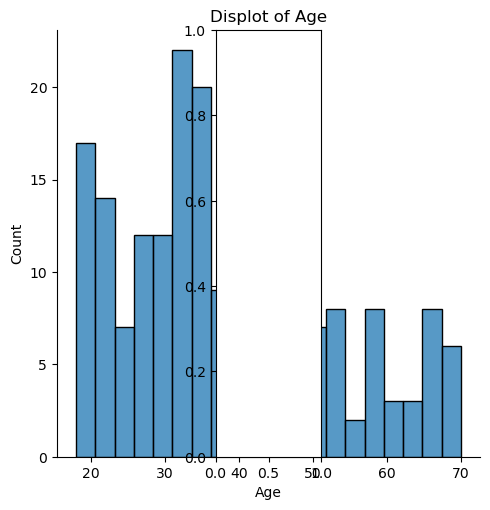

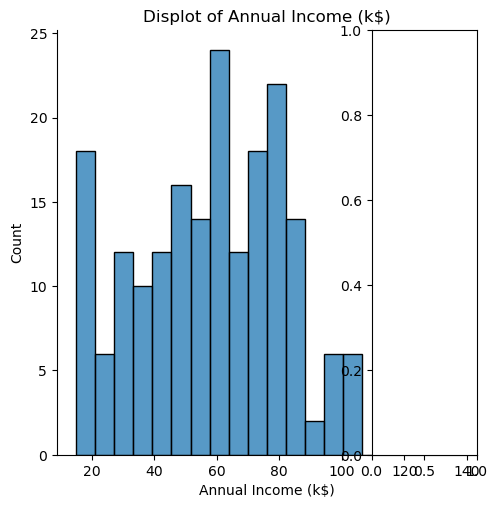

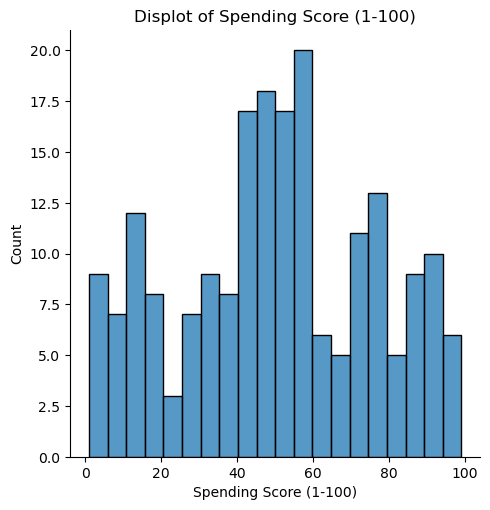

In [20]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.displot(df[x],bins=20)
    plt.title('Displot of {}'.format(x))
plt.show()

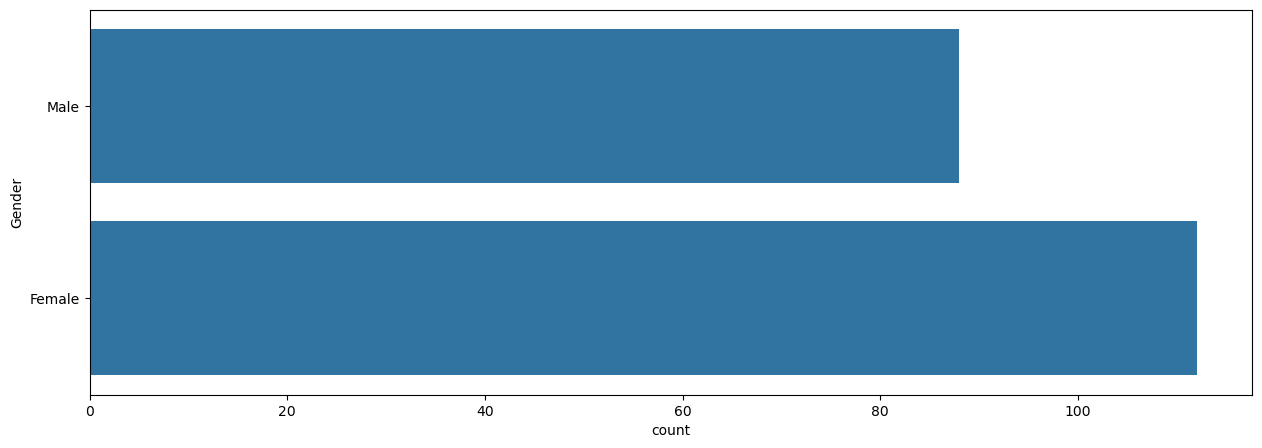

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

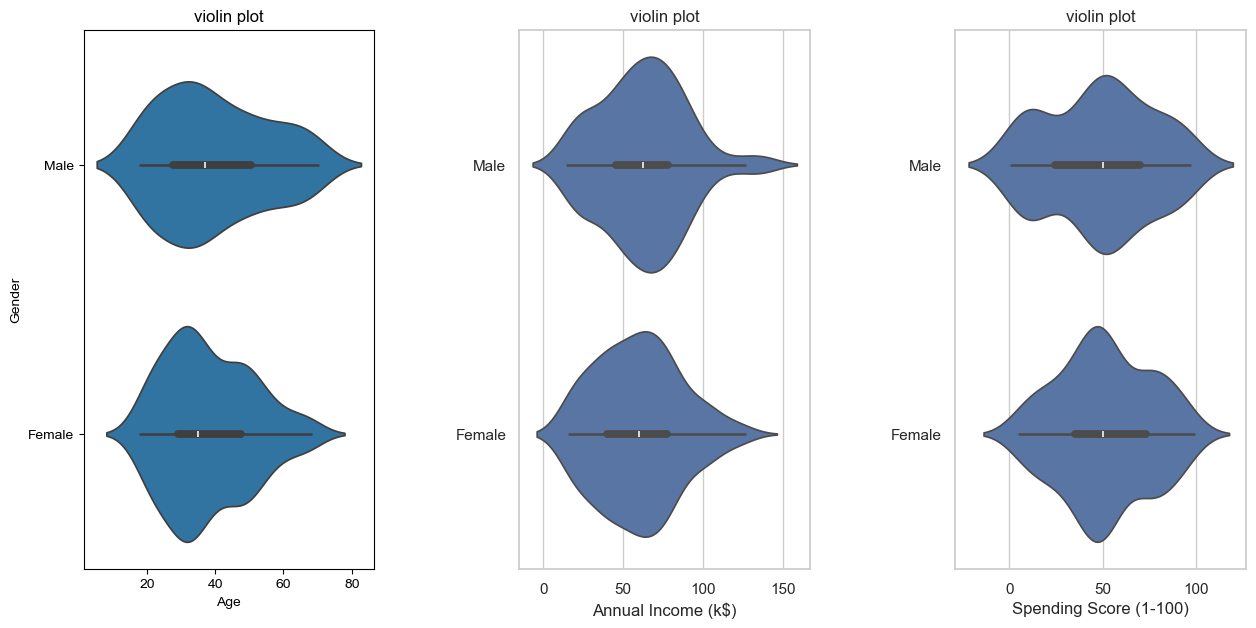

In [24]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='Gender',data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('violin plot')
plt.show()

In [29]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = age_55above.head(len(age_46_55))

agex = ["18_25", "26_35", "36_45", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_55above.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of customer and ages")
plt.xlabel("age")
plt.ylabel("number of customer")
plt.show()

NameError: name 'age_55above' is not defined

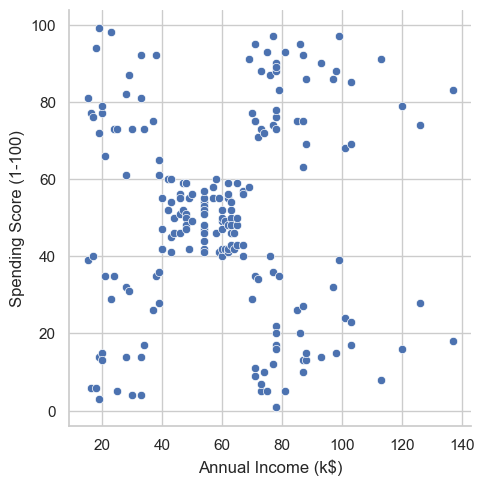

In [27]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)

In [31]:
ss_1_20=df["Spending Score (1-100)"][(df["spending score"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss_21_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21)&(df["Spending Score (1-100)"]<=40)]
ss_41_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41)&(df["Spending Score (1-100)"]<=60)]
ss_61_80=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61)&(df["Spending Score (1-100)"]<=80)]
ss_81_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81)&(df["Spending Score (1-100)"]<=100)]
ssx=["_1_20","21_40","41_60","61_80","81_100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, hue=ssx, legend=False, palette="rocket")
plt.title("spending scores")
plt.xtable("scores")
plt.ytable("Number of customres having scores")
plt.show()

KeyError: 'spending score'

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

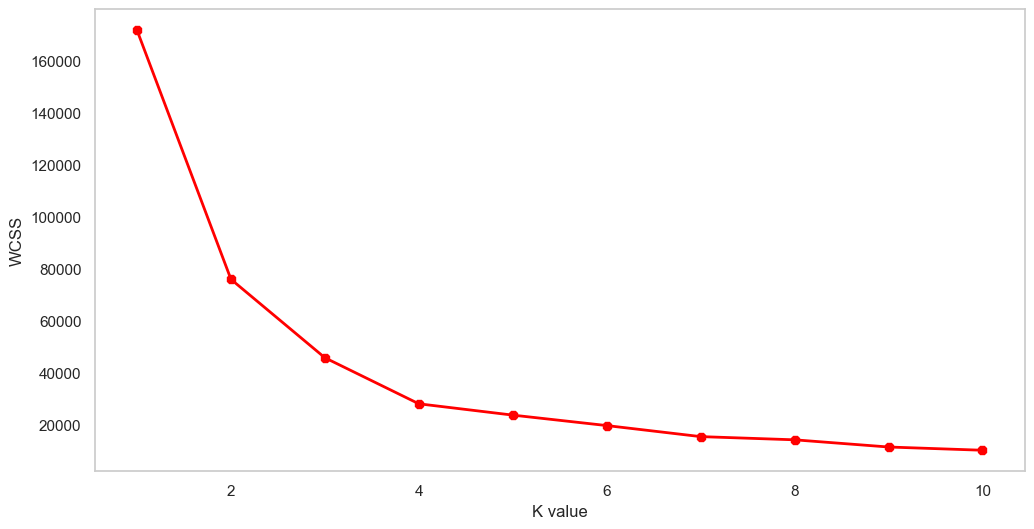

In [33]:
x1=df.loc[:, ["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for K in range(1, 11):
    kmeans = KMeans(n_clusters=K, init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_) 
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [35]:
Kmeans=KMeans(n_clusters=4)
label=Kmeans.fit_predict(x1)
print(label)

[1 0 3 0 1 0 3 0 3 0 3 0 3 0 3 0 1 1 3 0 1 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3
 0 3 0 2 0 2 1 3 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 0 1 0 2 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 2 0
 3 0 3 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
print(Kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


AttributeError: 'KMeans' object has no attribute 'clusters_'

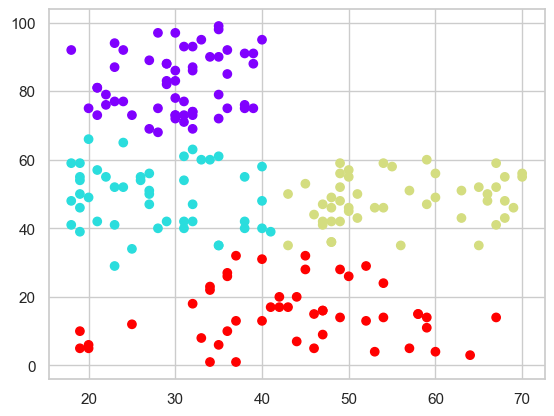

In [39]:
plt.scatter(x1[:,0],x1[:,1],c=Kmeans.labels_,cmap='rainbow')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.clusters_[:,1],color="black")
plt.title('clusters of customers')
plt.xlabel('age')
plt.ylabel('spending score(1-100)')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

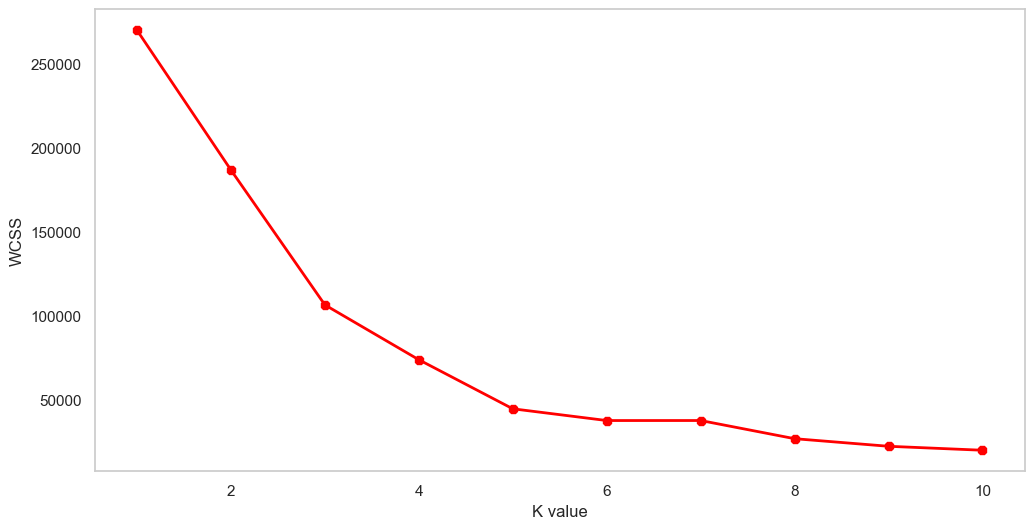

In [41]:
x2=df.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for K in range(1, 11):
    kmeans = KMeans(n_clusters=K, init='k-means++')
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_) 
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [43]:
Kmeans=KMeans(n_clusters=5)
label=Kmeans.fit_predict(x2)
print(label)


[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
print(Kmeans.cluster_centers_)

[[ 48.26        56.48      ]
 [ 87.          18.63157895]
 [114.71428571  78.42857143]
 [ 80.375       82.9375    ]
 [ 26.30434783  20.91304348]]


AttributeError: 'KMeans' object has no attribute 'clusters_'

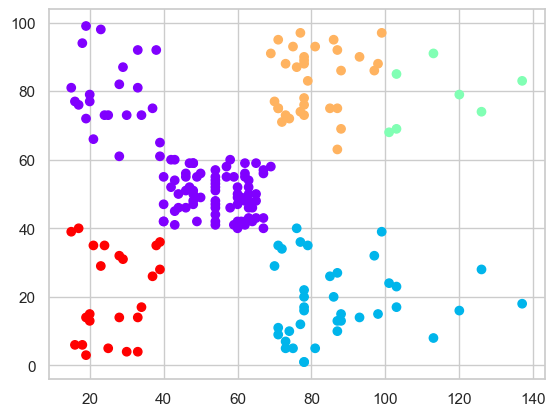

In [47]:
plt.scatter(x2[:,0],x2[:,1],c=Kmeans.labels_,cmap='rainbow')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.clusters_[:,1],color="black")
plt.title('clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('spending score(1-100)')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

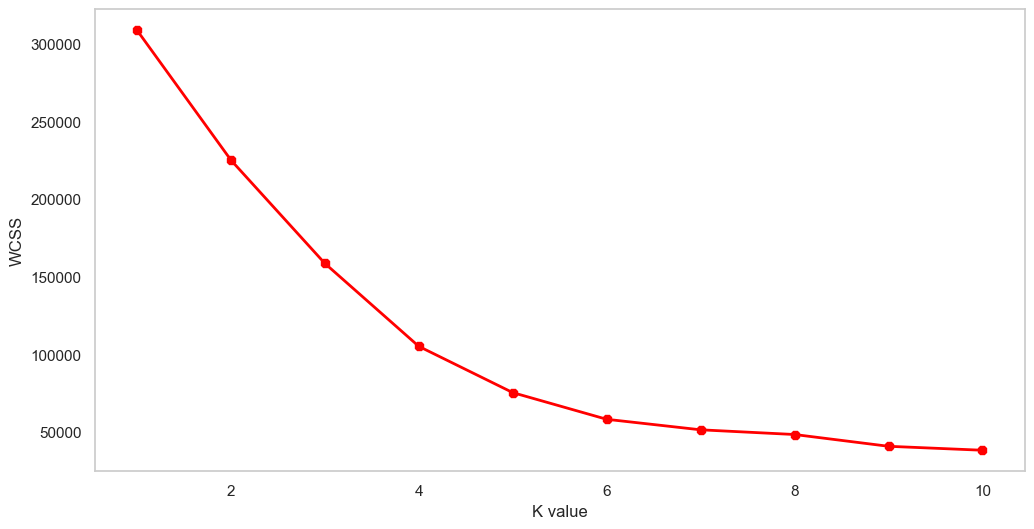

In [49]:
x3=df.iloc[:,1:]
wcss = []
for K in range(1, 11):
    kmeans = KMeans(n_clusters=K, init='k-means++')
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_) 
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [51]:
Kmeans=KMeans(n_clusters=5)
label=Kmeans.fit_predict(x3)
print(label)


[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 3 4 2 4 2 4 3 2 2 2 3 2 2 3 3 2 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 3 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 2 3 2 2 3 3 3 3 2 3 3 3 3 3
 2 3 2 2 2 3 3 3 3 3 3 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [53]:
print(Kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [40.39473684 87.         18.63157895]
 [33.75       40.64583333 36.16666667]
 [52.94230769 55.28846154 49.73076923]
 [25.52173913 26.30434783 78.56521739]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


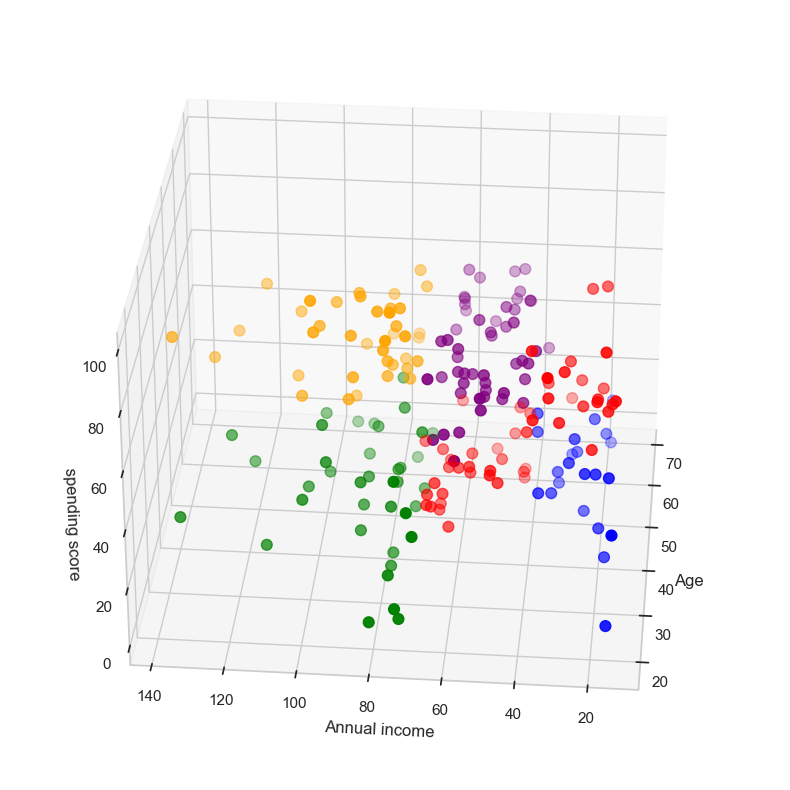

In [55]:
clusters=Kmeans.fit_predict(x3)
df["label"]=clusters
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0],df["Annual Income (k$)"][df.label==0],df["Spending Score (1-100)"][df.label==0],c="blue",s=60)
ax.scatter(df.Age[df.label==1],df["Annual Income (k$)"][df.label==1],df["Spending Score (1-100)"][df.label==1],c="red",s=60)
ax.scatter(df.Age[df.label==2],df["Annual Income (k$)"][df.label==2],df["Spending Score (1-100)"][df.label==2],c="green",s=60)
ax.scatter(df.Age[df.label==3],df["Annual Income (k$)"][df.label==3],df["Spending Score (1-100)"][df.label==3],c="orange",s=60)
ax.scatter(df.Age[df.label==4],df["Annual Income (k$)"][df.label==4],df["Spending Score (1-100)"][df.label==4],c="purple",s=60)
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual income")
ax.set_zlabel("spending score")
plt.show()